In [23]:
from PIL import Image

import fitz
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

in_path = '/home/vimalkumar/Documents/Marion Clark/1-100_Image'
out_path = '/home/vimalkumar/Documents/Marion Clark/images'

for file in os.listdir(in_path):
    #print(file)
    file_name = os.path.splitext(file)[0]
    if file.endswith('.tif') or file.endswith('.jpeg') or file.endswith('.png') or file.endswith('.gif') or file.endswith('.jpg') or file.endswith('.webp'):
        #print(file)
        #print(file_name)
        img = Image.open(os.path.join(in_path,file))
        img.seek(0)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img.save(os.path.join(out_path,file_name +'.jpeg'))
        
    if file.endswith('.pdf') or file.endswith('.PDF'):
        #print(file)
        doc = fitz.open(os.path.join(in_path,file))
        page = doc.load_page(0)  # number of page
        pix = page.get_pixmap(matrix=fitz.Matrix(150/72,150/72))# for 150dpi
        
        pix.pil_save(os.path.join(out_path,file_name+'.jpeg'))

        

na Imus me a a
Albertson  Isabel M Walter E Albertson Ch 438  8718    Albertsm  h Foe
Albertson i
Mrs Mattie A  et aljJohn 0 Hiser  et al Ch 326   6765   Albertson M
Albritton  Lula Glover Albritton Ch 236  5183   Aloertsm    0
Albritton  A J Gilbert Hoffman  et al Ch 188 428k Albertsm  ML 
  Albritton  
Mrs Mattie A  et al  R L Barnes  et al Ch 3134 6723   Alba Ered BO et
  Albertson WE   sesboara Air Line Ry L 22 8 Albertson  MoD
  Albritton  A. J asaners Hoffman I 162  6707    Albert on  F
lA N
Albright Wm  L foponaia   Brown 144 6303   Albritton A J
  i
i
Albright Geo   setredate Packing Co L 276   9689 Albertsm    
  i i
  Albertson M E  E  Reed IL 2 3  8992 Albrittm  Verna
i  
  Albertson M  E som   Knight L 294  10278 a tton Glover
jo Alderman P. S loitra and Greenwood Exch  L 68  4363 eee Valter
           cr ee S Kedney gy Gf 235 Adcorm GO
  Aldrich J Frank Merchant Nat 1 Bank i  
  as Receiver PETITION TL 174  5828    Alcorn  
Aldrich  Isaac N ln M  Hampton   2s  10009    Ald

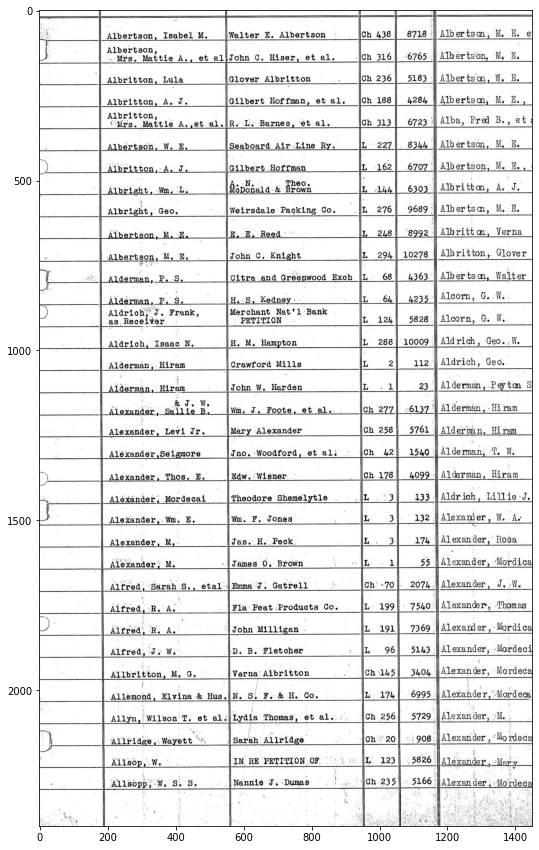

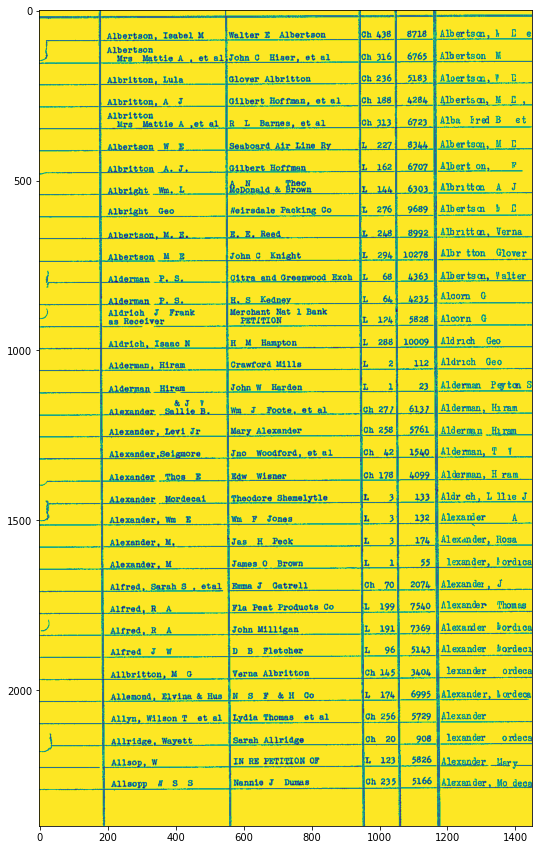

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import cv2
import re
import numpy as np

im = Image.open(r"/home/vimalkumar/Documents/Marion Clark/images/1004.jpeg")
width, height = im.size
left = 50
top = height /12
right = 1500
bottom = 3 * height / 3.1
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(15,15))
plt.imshow(im1)
im1.save('/home/vimalkumar/Documents/Marion Clark/crop/1_1.jpeg')

img = cv2.imread('/home/vimalkumar/Documents/Marion Clark/crop/1_1.jpeg', 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)
plt.figure(figsize=(15,15))
plt.imshow(res)
imm = Image.fromarray(res)

imm.save('/home/vimalkumar/Documents/Marion Clark/crop/1_2.jpeg')

image = cv2.imread('/home/vimalkumar/Documents/Marion Clark/crop/1_2.jpeg', 0)
text = pytesseract.image_to_string(image,config = '--psm 6')
#print(text)

new_text = re.sub('[^a-zA-Z0-9 \n\.]', ' ', text)
print(new_text)

file = open('/home/vimalkumar/Documents/Marion Clark/text_files/file.txt', 'w')
file.write(new_text)
file.close()

RR A A AR A A
: dose INDEX TO ADJUDICATED CASES — MARION COUNTY, FLORIDA
| puaintirrs | DEFENDANTS ee | DEFENDANTS | PLAINTIFFS : eel RM f
pp —_—— pela icici irc
| Allston, 5 P IR C Muncaster L149 6390 llalexander, J, etal Carson Naval Stores Co , 293], 4373
Alsabrook Peter h S Joms et al Ch oi 1422 Alexander Mordecai Jas D Gates hu 16] 1253 Ly
| |atston Iuey te Alston Ch 21| 995 [alto a, VY lliam P E M nnie Sanuers h 163} 6743 P|
|
Altman, lala & [Henry F_ Altman Oh 136 3231 pont J ¥,etal [Davia M Hoover L105} 5348 |
Altman, Lillian Bliss Ipaseo Altman Oh anal 7622 Aley F Let al Fred lledger etal Ch 412} 8322 |
pus _H Fetal | Mok ean Lbr Co_, et al al 3721 |aaien, verry H_L_ Shearer = 241] 5301 |
| | anges AS, et al Helen W Richardson,etal Ch 446) 8881 |Aiigood ¥ & EF Partee [_292] 10197 i
| Ls b H Fo Tne O1G ae G 508 | 00 ghliigon, cH A Vinchew h. 192) 7390
| A nboeiddee A sn, He ih : oo72 | sxig000 gf et al ~ Hood lon 1352
ls od, se A n iHen aA a hn 506 00 /o | auiridge Sarah ayett 

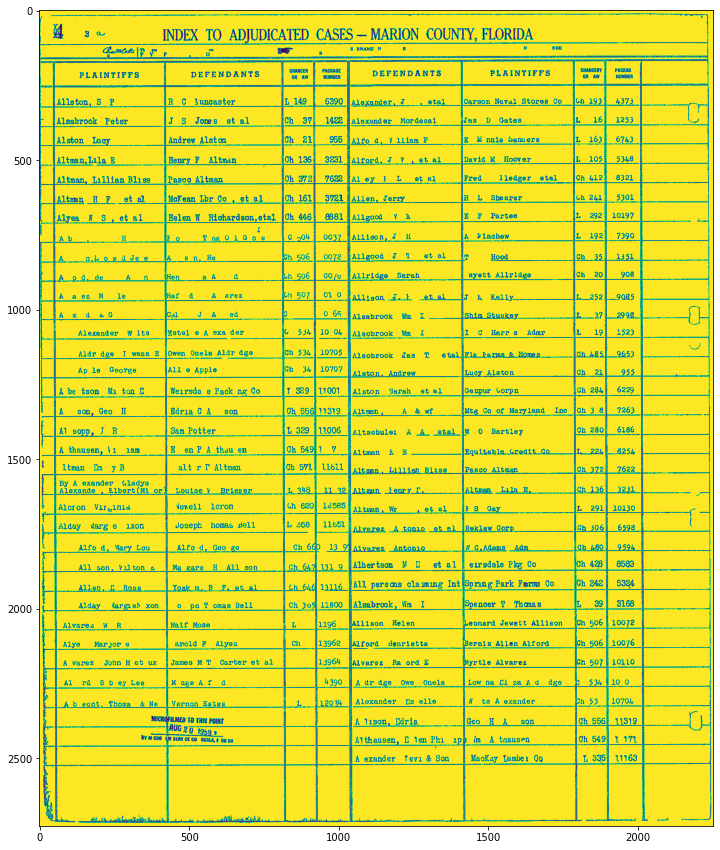

In [25]:
img = cv2.imread('/home/vimalkumar/Documents/Marion Clark/images/1005.jpeg', 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)
plt.figure(figsize=(15,15))
plt.imshow(res)
imm = Image.fromarray(res)

imm.save('/home/vimalkumar/Documents/Marion Clark/crop/1005_1.jpeg')

image = cv2.imread('/home/vimalkumar/Documents/Marion Clark/crop/1005_1.jpeg', 0)
text = pytesseract.image_to_string(image,config = '--psm 6')
print(text)

new_text = re.sub('[^a-zA-Z0-9 \n\.]', ' ', text)
print(new_text)

file = open('/home/vimalkumar/Documents/Marion Clark/text_files/file1.txt', 'w')
file.write(new_text)
file.close()

In [32]:
with open("/home/vimalkumar/Documents/Marion Clark/text_files/file.txt", "r") as a_file:
    for line in a_file:
        #print(line)
        name = line.split()
        name = name[:2]
        name = ' '.join(name)
        #print(name_)
        #print('plaintiff_name :',name)
        
        chancery_regex = r'\b[A-Za-z]{1,2}\s*[0-9]{1,4}\b'
        pattern = re.findall(chancery_regex,line)
        pattern = ' '.join(pattern)
        #print(pattern)
        
        
            
        
        print(name,' ',pattern)
        

na Imus   
Albertson Isabel   Ch 438
Albertson i   
Mrs Mattie   Ch 326
Albritton Lula   Ch 236
Albritton A   Ch 188
Albritton   
Mrs Mattie   Ch 3134
Albertson WE   L 22
Albritton A.   I 162
lA N   
Albright Wm   
i   
i   
Albright Geo   L 276
i i   
Albertson M   IL 2
i   
Albertson M   L 294
jo Alderman   L 68
cr ee   Gf 235
Aldrich J   
as Receiver   TL 174
Aldrich Isaac   
   
Alderman Hiram   L   112
   
Alderman Hirem   ou 1
I   
Alexander Sallie   ch 2
Alexander Levi   Ch 258
i   
Alexander Seigmore   Ch 42
Alexander Thos   e   4099
i   
Alexander Mordecai   L 5
2 Alexander   
i   
Alexander M   LL 3
Alexander M   L 1
Alfred Sarah   Ch 70
   
Alfred RA   L199
a   
2 Alfred   IL 191
Alfred JW   L  96
Allbritton MG   Ch 145
Allemond Elvina   a 6995
Allyn Wilson   Ch 256
i nner   
Allridge Wayett   Ch 20
veel fp   
Allsop W   T 123
Alexander rr   
Allsopp 4   S  8 Gh 235
   
   
   


In [35]:
new_text
        

'na Imus me a a\nAlbertson  Isabel M Walter E Albertson Ch 438  8718    Albertsm  h Foe\nAlbertson i\nMrs Mattie A  et aljJohn 0 Hiser  et al Ch 326   6765   Albertson M\nAlbritton  Lula Glover Albritton Ch 236  5183   Aloertsm    0\nAlbritton  A J Gilbert Hoffman  et al Ch 188 428k Albertsm  ML \n  Albritton  \nMrs Mattie A  et al  R L Barnes  et al Ch 3134 6723   Alba Ered BO et\n  Albertson WE   sesboara Air Line Ry L 22 8 Albertson  MoD\n  Albritton  A. J asaners Hoffman I 162  6707    Albert on  F\nlA N\nAlbright Wm  L foponaia   Brown 144 6303   Albritton A J\n  i\ni\nAlbright Geo   setredate Packing Co L 276   9689 Albertsm    \n  i i\n  Albertson M E  E  Reed IL 2 3  8992 Albrittm  Verna\ni  \n  Albertson M  E som   Knight L 294  10278 a tton Glover\njo Alderman P. S loitra and Greenwood Exch  L 68  4363 eee Valter\n           cr ee S Kedney gy Gf 235 Adcorm GO\n  Aldrich J Frank Merchant Nat 1 Bank i  \n  as Receiver PETITION TL 174  5828    Alcorn  \nAldrich  Isaac N ln M  Ha